In [2]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
#Leemos el CSV
nlp = pd.read_csv('../data/train.csv')

In [4]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [5]:
nlp.shape

(7613, 5)

In [6]:
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

# Analisis de keywords

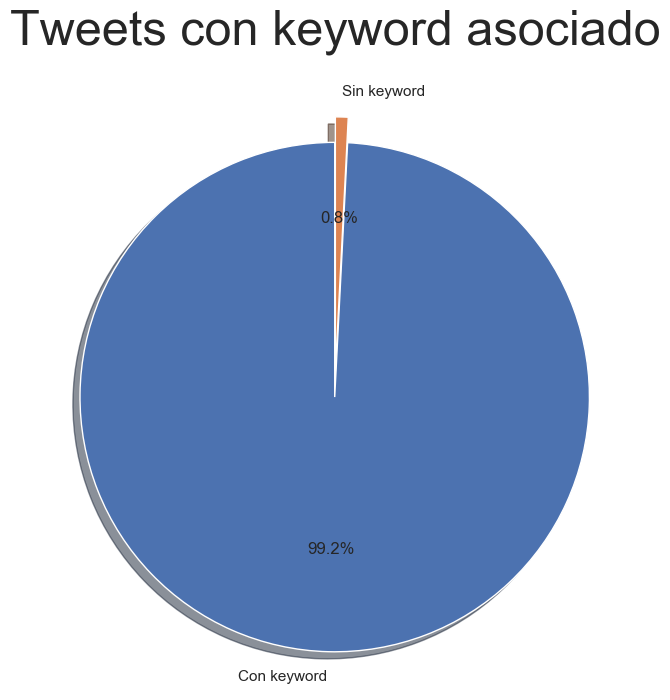

In [7]:
sin_keyword = nlp['keyword'].isnull().sum()
con_keyword = nlp['keyword'].count()-sin_keyword

sizes = [con_keyword, sin_keyword]
nombres = ["Con keyword", "Sin keyword"]

plt.figure(figsize=(11.7, 8.27))
plt.title('Tweets con keyword asociado', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

In [8]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

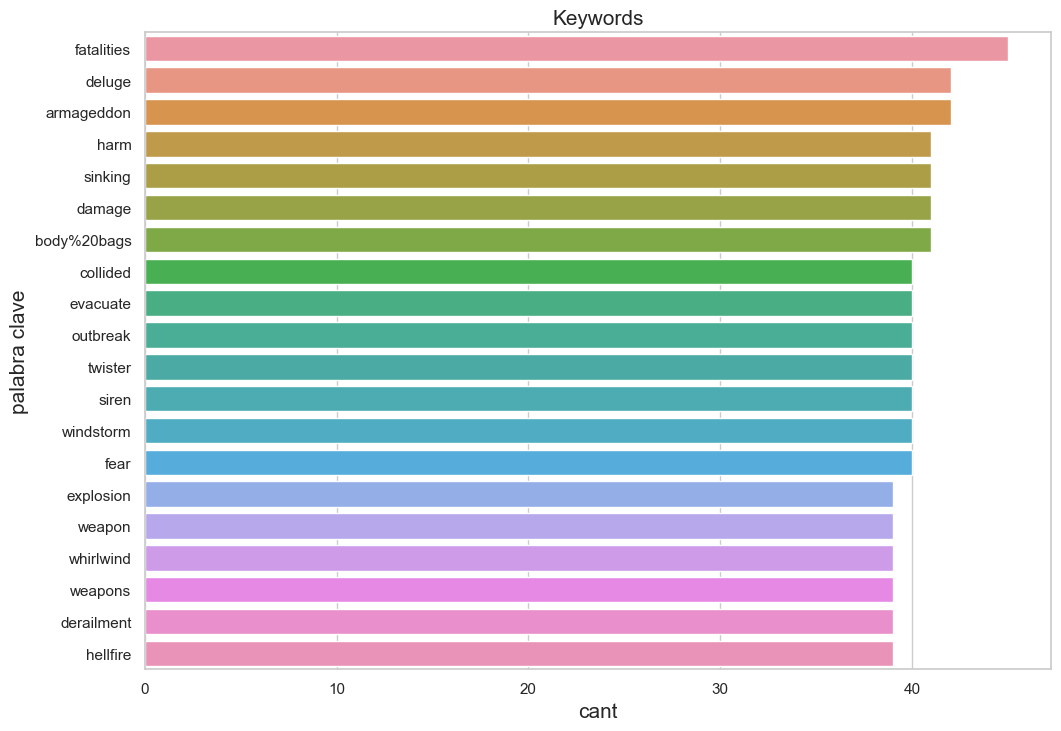

In [9]:
#KEYWORDS MAS POPULARES PARA TODOS LOS TARGET
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword.values, y=cant_keyword.index)

ax.set_title("Keywords",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [10]:
target1 = nlp[nlp['target']==1]
cant_keyword_target1 = target1['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

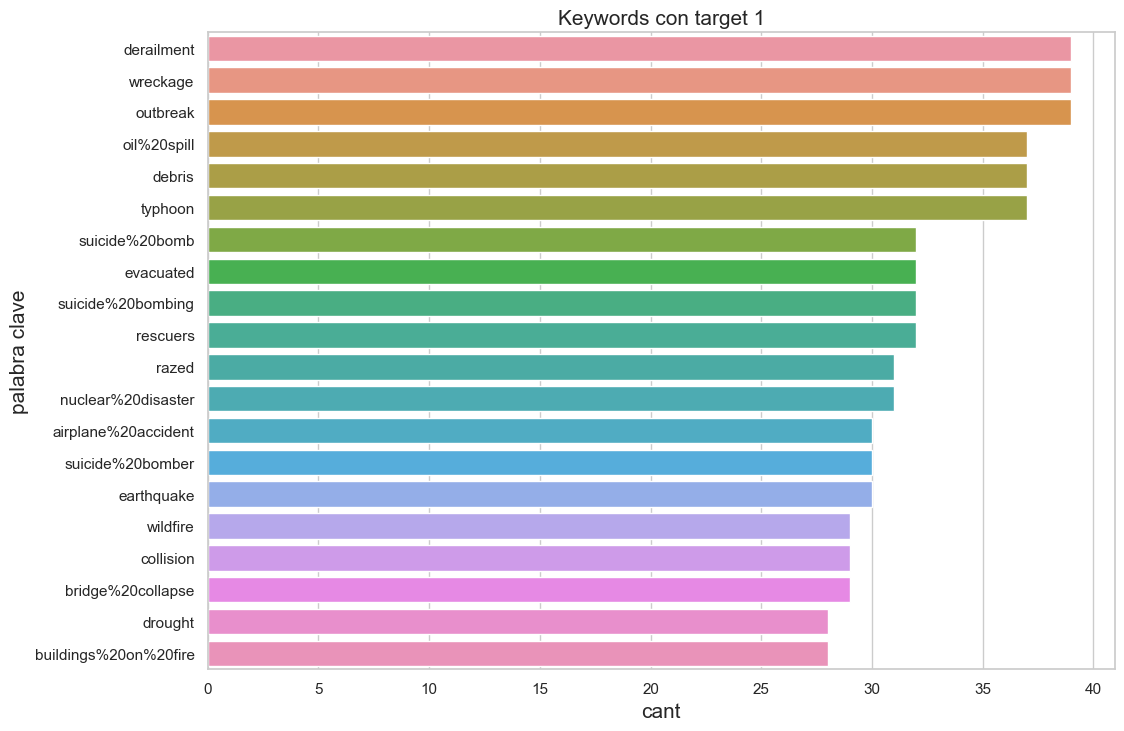

In [11]:
#KEYWORDS MAS POPULARES PARA TARGET 1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target1.values, y=cant_keyword_target1.index)

ax.set_title("Keywords con target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [12]:
target0 = nlp[nlp['target']==0]
cant_keyword_target0 = target0['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

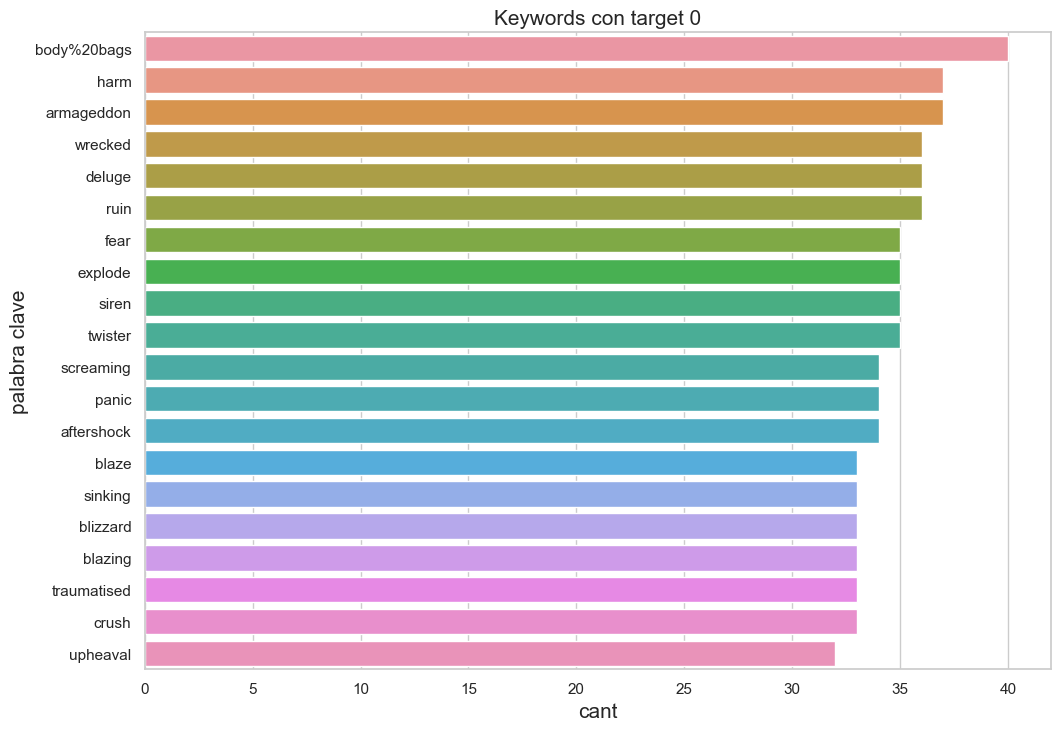

In [13]:
#KEYWORDS MAS POPULARES PARA TARGET 0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target0.values, y=cant_keyword_target0.index)

ax.set_title("Keywords con target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [14]:
keywords_df = nlp.groupby(['keyword', 'target'])[['text']].count().reset_index()
keywords_df['populares'] = keywords_df['keyword'].isin(cant_keyword.index)
keywords_df = keywords_df[keywords_df['populares']==True].sort_values(by='text', ascending=False)
keywords_df.head()

,keyword,target,text,populares
57,body%20bags,0,40,True
138,derailment,1,39,True
304,outbreak,1,39,True
15,armageddon,0,37,True
235,harm,0,37,True


Text(0, 0.5, 'palabra clave')

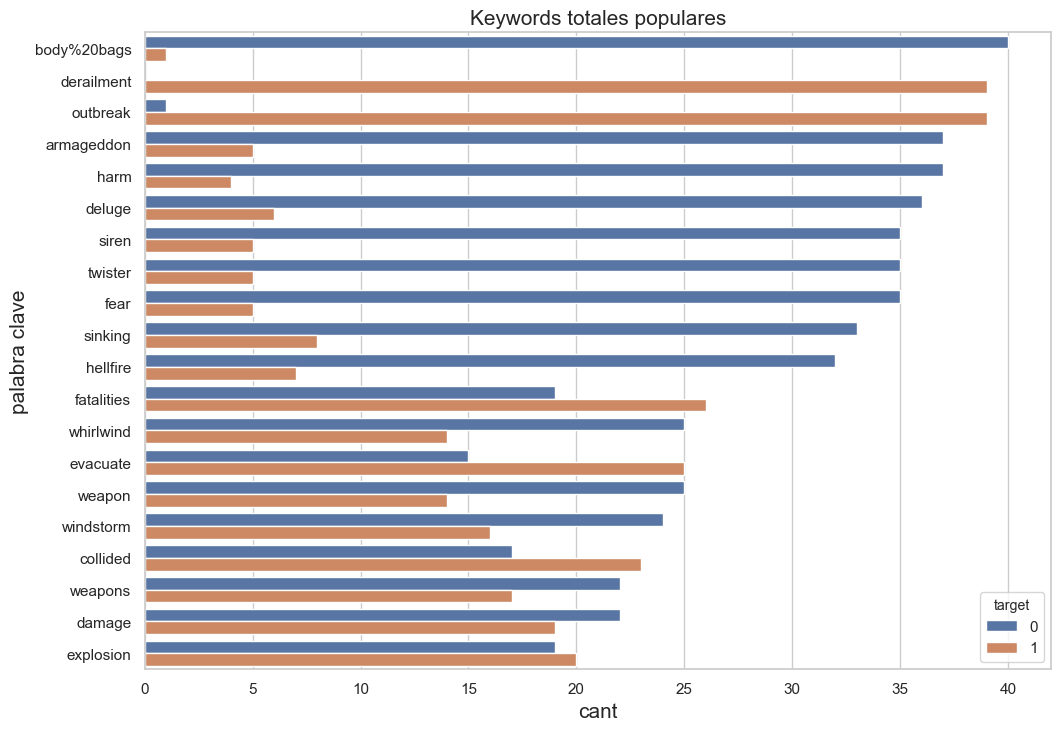

In [15]:
#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES PARA LOS 2
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))



ax = sns.barplot(x='text', y='keyword', hue='target', data=keywords_df)

ax.set_title("Keywords totales populares",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [16]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]
cant_keyword.head(3)

fatalities    45
deluge        42
armageddon    42
Name: keyword, dtype: int64

In [17]:
df_target1 = keywords_df[keywords_df['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = keywords_df[keywords_df['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)
df_totales.head(50)

,keyword,cant_target1,cant_target0,cant_totales
2,fatalities,26,19.0,45.0
16,armageddon,5,37.0,42.0
13,deluge,6,36.0,42.0
19,body%20bags,1,40.0,41.0
18,harm,4,37.0,41.0
6,damage,19,22.0,41.0
11,sinking,8,33.0,41.0
14,siren,5,35.0,40.0
3,evacuate,25,15.0,40.0
4,collided,23,17.0,40.0


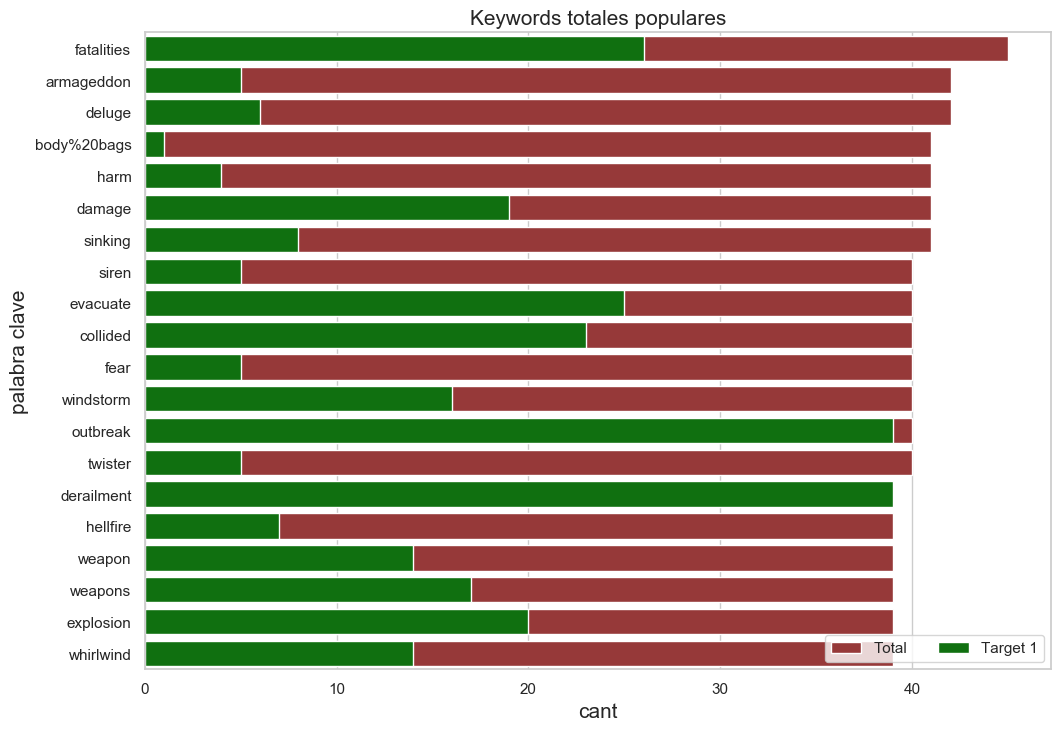

In [18]:
#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES PARA LOS 2
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords totales populares",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)


In [19]:
#palabras que hacen ref a tragedias
selected_words_singular=['fire','flood','inundate','earthquake','quake','deluge','euption','twister','tornado','hurricane', 'landslide','typhoon','wildfire','forest fire','drought','avalanche','urgent','important','danger','warrning','evacuation']
selected_words_plural=['fires','floods', 'earthquakes','quakes','deluges','rashes','tornadoes','hurricanes', 'landslides','typhoons','wildfires','forest fires','droughts','avalanches']
selected_words_other=['heat wave','died','flooding','flooded','damage','urgent','important','danger','warrning','help','evacuation']
col_one_list = nlp['keyword'].tolist()
selected_words = selected_words_singular + selected_words_plural + selected_words_other + col_one_list
s = set(selected_words)

In [20]:

nlp['words'] = nlp.text.str.strip().str.split()
palabras_tragedias = nlp.assign(matches=[len(set(el) & s) for el in nlp.words]).dropna()
palabras_tragedias.head()


,id,keyword,location,text,target,words,matches
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,"[@bbcmtd, Wholesale, Markets, ablaze, http://t...",1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,"[We, always, try, to, bring, the, heavy., #met...",0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,"[#AFRICANBAZE:, Breaking, news:Nigeria, flag, ...",1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,"[Crying, out, for, more!, Set, me, ablaze]",1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,"[On, plus, side, LOOK, AT, THE, SKY, LAST, NIG...",0


In [21]:
df_keywords_matched =  palabras_tragedias[palabras_tragedias['matches']!=1]
df_keywords_unmatched =  palabras_tragedias[palabras_tragedias['matches']==0]

list_keywords_matched = df_keywords_matched['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

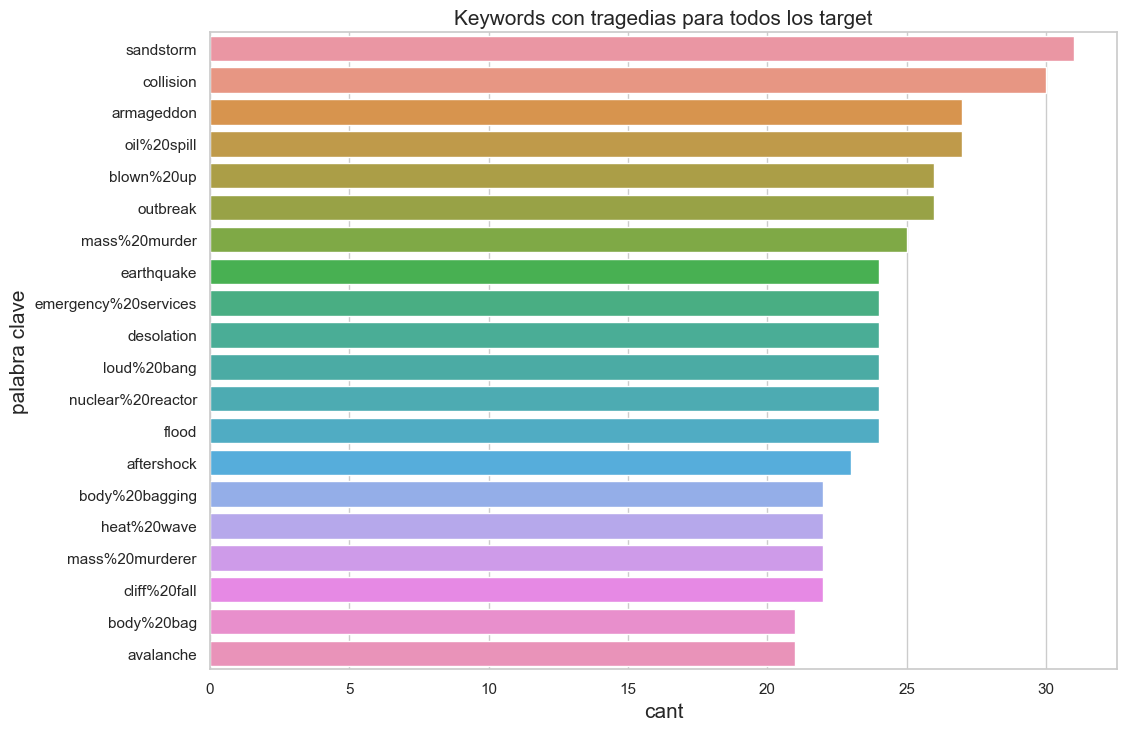

In [22]:
#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA TODOS LOS TARGET
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_keywords_matched.values, y=list_keywords_matched.index)

ax.set_title("Keywords con tragedias para todos los target",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [23]:
df_target1_matched = df_keywords_matched[df_keywords_matched['target']==1]
list_target1_matched = df_target1_matched['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

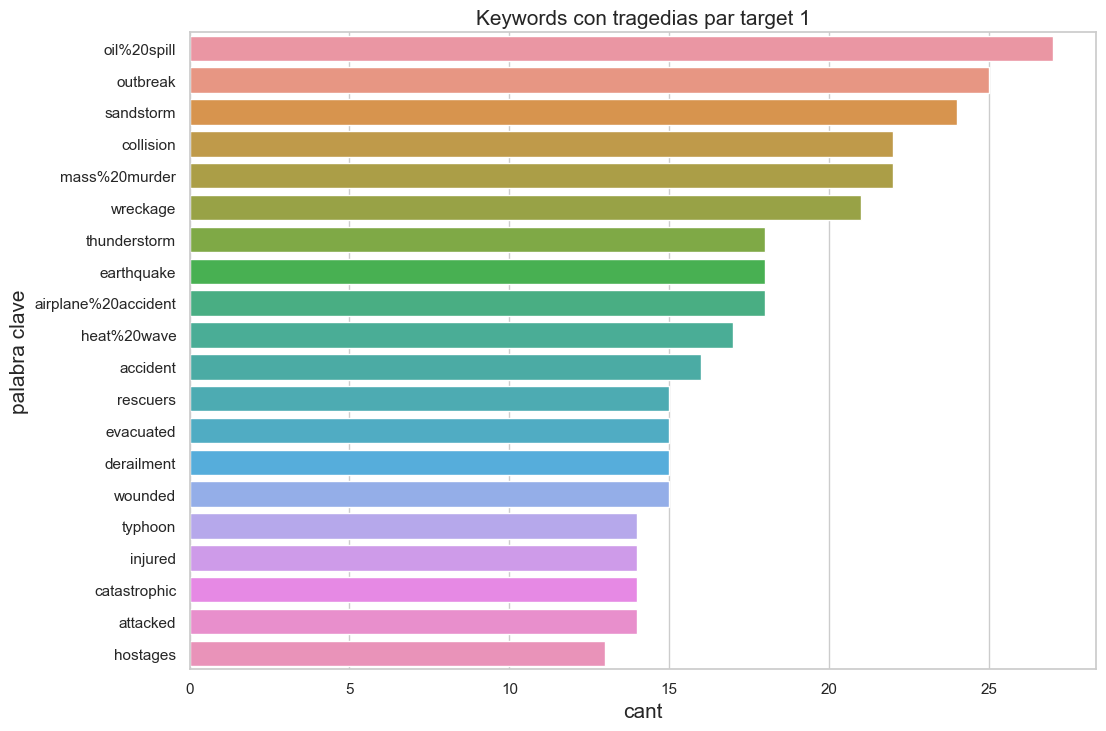

In [24]:
#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA target=1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target1_matched.values, y=list_target1_matched.index)

ax.set_title("Keywords con tragedias par target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

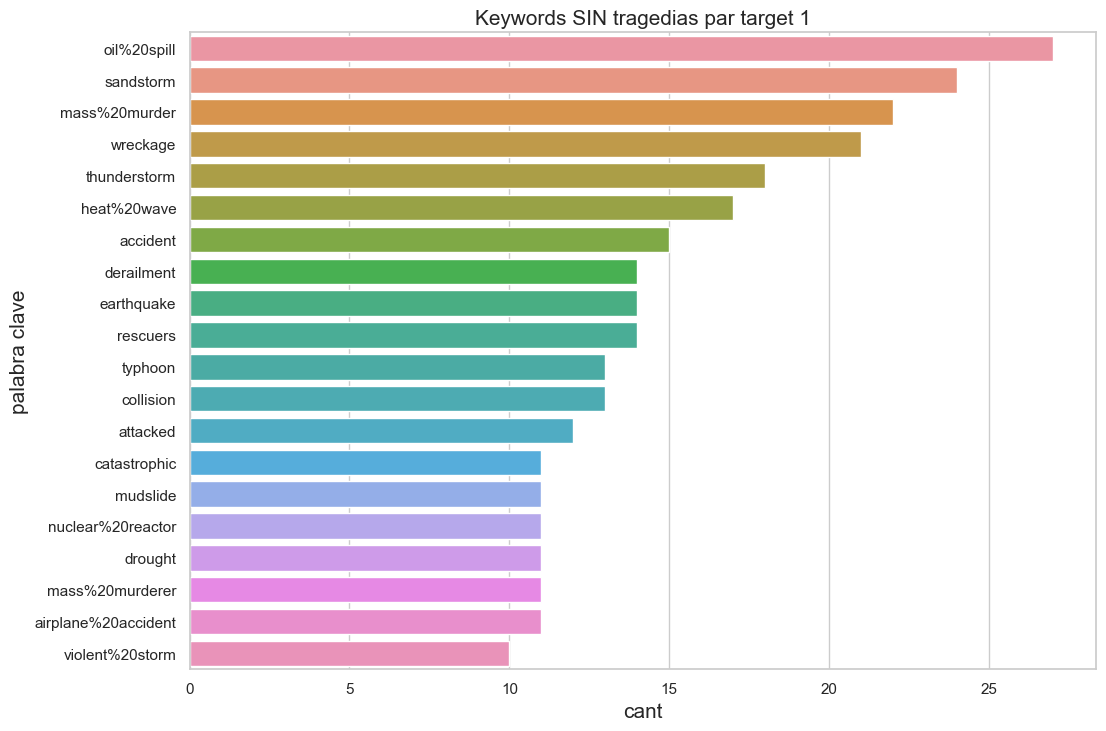

In [25]:
df_target1_unmatched = df_keywords_unmatched[df_keywords_unmatched['target']==1]
list_target1_unmatched = df_target1_unmatched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE NO CONTIENEN TRAGEDIAS PARA target=1
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target1_unmatched.values, y=list_target1_unmatched.index)

ax.set_title("Keywords SIN tragedias par target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

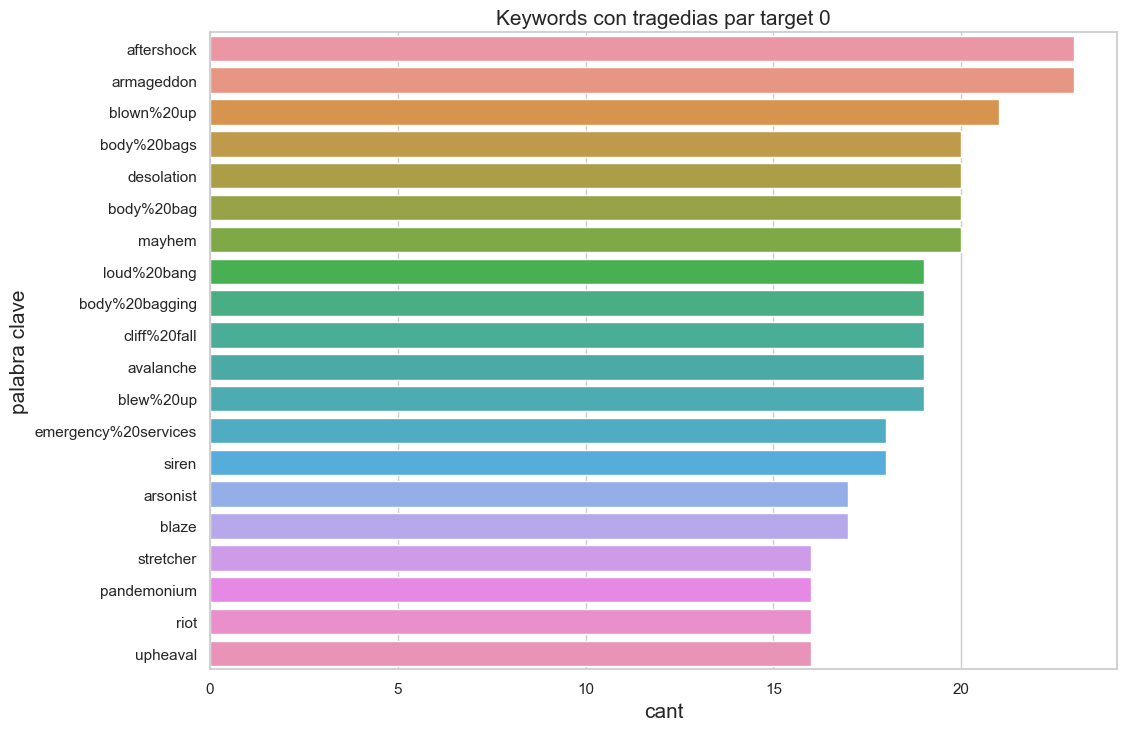

In [26]:
df_target0_matched = df_keywords_matched[df_keywords_matched['target']==0]
list_target0_matched = df_target0_matched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE CONTIENEN TRAGEDIAS PARA target=0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target0_matched.values, y=list_target0_matched.index)

ax.set_title("Keywords con tragedias par target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

Text(0, 0.5, 'palabra clave')

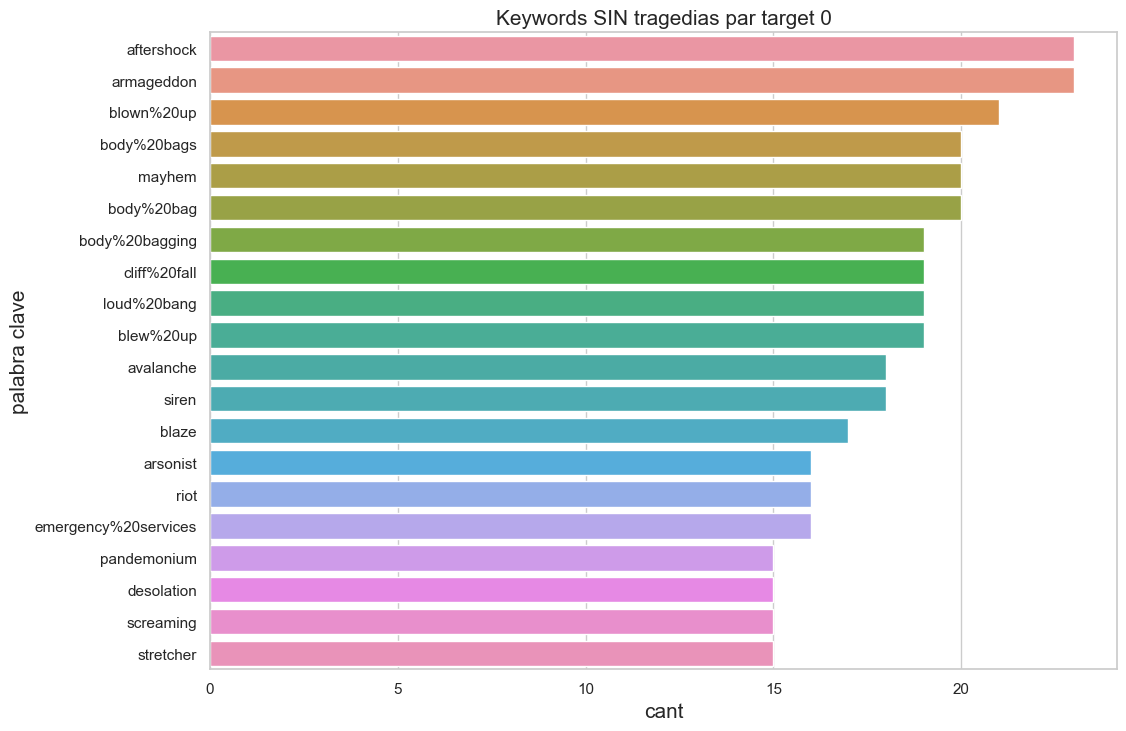

In [27]:
df_target0_unmatched = df_keywords_unmatched[df_keywords_unmatched['target']==0]
list_target0_unmatched = df_target0_unmatched['keyword'].value_counts().iloc[:20]

#KEYWORDS QUE NO CONTIENEN TRAGEDIAS PARA target=0
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=list_target0_unmatched.values, y=list_target0_unmatched.index)

ax.set_title("Keywords SIN tragedias par target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [28]:
df_keywords_matched_grouped = df_keywords_matched.groupby(['keyword', 'target'])[['text']].count().reset_index()
df_keywords_matched_grouped['populares'] = df_keywords_matched_grouped['keyword'].isin(cant_keyword.index)
df_keywords_matched_grouped = df_keywords_matched_grouped[df_keywords_matched_grouped['populares']==True].sort_values(by='text', ascending=False)

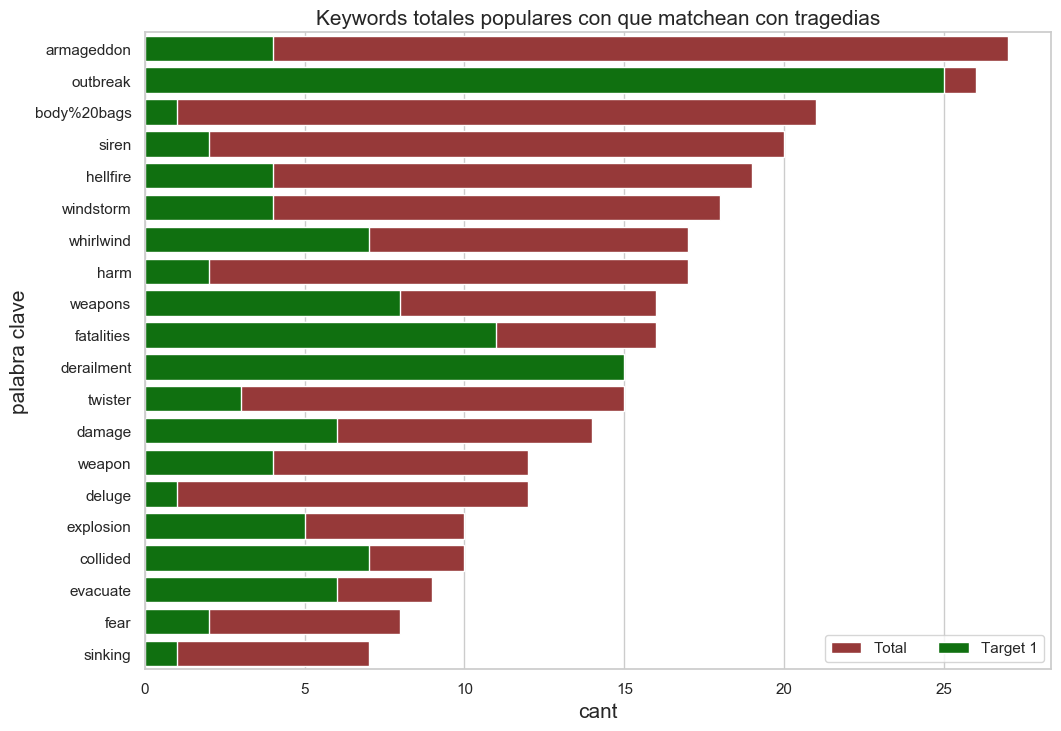

In [29]:
#comparacion de los que matchearon
df_target1 = df_keywords_matched_grouped[df_keywords_matched_grouped['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = df_keywords_matched_grouped[df_keywords_matched_grouped['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)

#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES MATCHEADOS
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords totales populares con que matchean con tragedias",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)


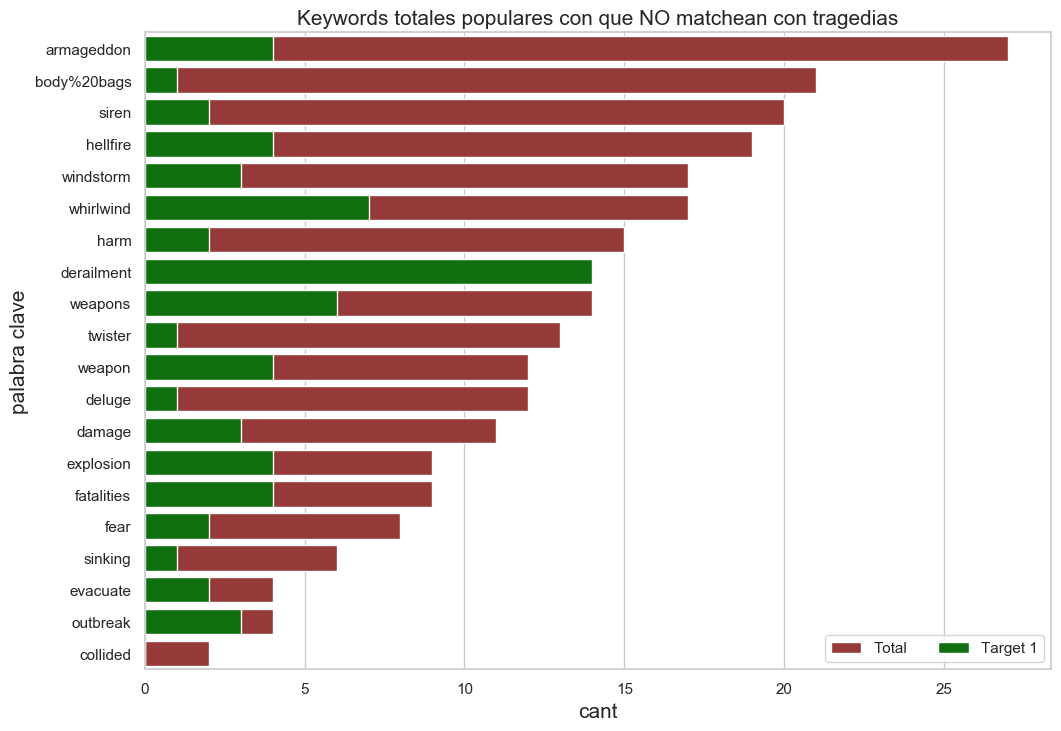

In [30]:
df_keywords_unmatched_grouped = df_keywords_unmatched.groupby(['keyword', 'target'])[['text']].count().reset_index()
df_keywords_unmatched_grouped['populares'] = df_keywords_unmatched_grouped['keyword'].isin(cant_keyword.index)
df_keywords_unmatched_grouped = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['populares']==True].sort_values(by='text', ascending=False)

#comparacion de los que NO matchearon
df_target1 = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = df_keywords_unmatched_grouped[df_keywords_unmatched_grouped['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)

#COMPARACION ENTRE TARGET 1 Y TARGET 0 DE LAS KEYWORDS MAS POPULARES NO MATCHEADOS
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="brown")            
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="green")

ax.set_title("Keywords totales populares con que NO matchean con tragedias",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)

# Keyword vs Hashtags 

In [97]:
def filtrarPalabras(miArray):
    variable = ''
    for key in miArray:
         if '#' in str(key):
            variable = variable + ' ' + str(key)
    return variable

In [178]:
df_hashtags = palabras_tragedias[['text', 'target', 'keyword', 'matches']]
df_hashtags.dropna(inplace=True)
df_hashtags['words'] = palabras_tragedias.text.str.strip().str.split()
df_hashtags = df_hashtags.assign(hashtags=[filtrarPalabras(el) for el in df_hashtags.words])
df_hashtags = df_hashtags[['keyword', 'hashtags', 'matches', 'target']].dropna(how='any')
df_hashtags['hashtags'] = df_hashtags['hashtags'].str.lower()
df_hashtags.head()

,keyword,hashtags,matches,target
31,ablaze,,1,1
32,ablaze,#metal #rt,0,0
33,ablaze,#africanbaze:,1,1
34,ablaze,,1,0
35,ablaze,,0,0


# Relacion entre Hashtags y keywords para todos los target

In [326]:
df_hashtags_keywords = pd.DataFrame(df_hashtags.hashtags.str.split(' ').tolist(), index=df_hashtags.keyword).stack()
df_hashtags_keywords = df_hashtags_keywords.reset_index([0, 'keyword'])
df_hashtags_keywords.columns = ['keyword', 'hashtags']
df_hashtags_keywords['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords = df_hashtags_keywords.dropna()
df_hashtags_keywords.drop_duplicates(inplace=True)

#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>4]
hashtags_mas_usados.head(30)

,hashtags,keyword
862,#news,31
896,#nowplaying,17
577,#hiroshima,10
1221,#tcot,7
673,#jobs,7
398,#emmerdale,6
619,#india,5
505,#gbbo,5
1303,#tubestrike,5
1450,#û_,5


In [327]:
df_hashtags_keywords['popular'] = df_hashtags_keywords['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords = df_hashtags_keywords[df_hashtags_keywords['popular']==True]

In [328]:
df_hashtags_keywords.shape

(108, 3)

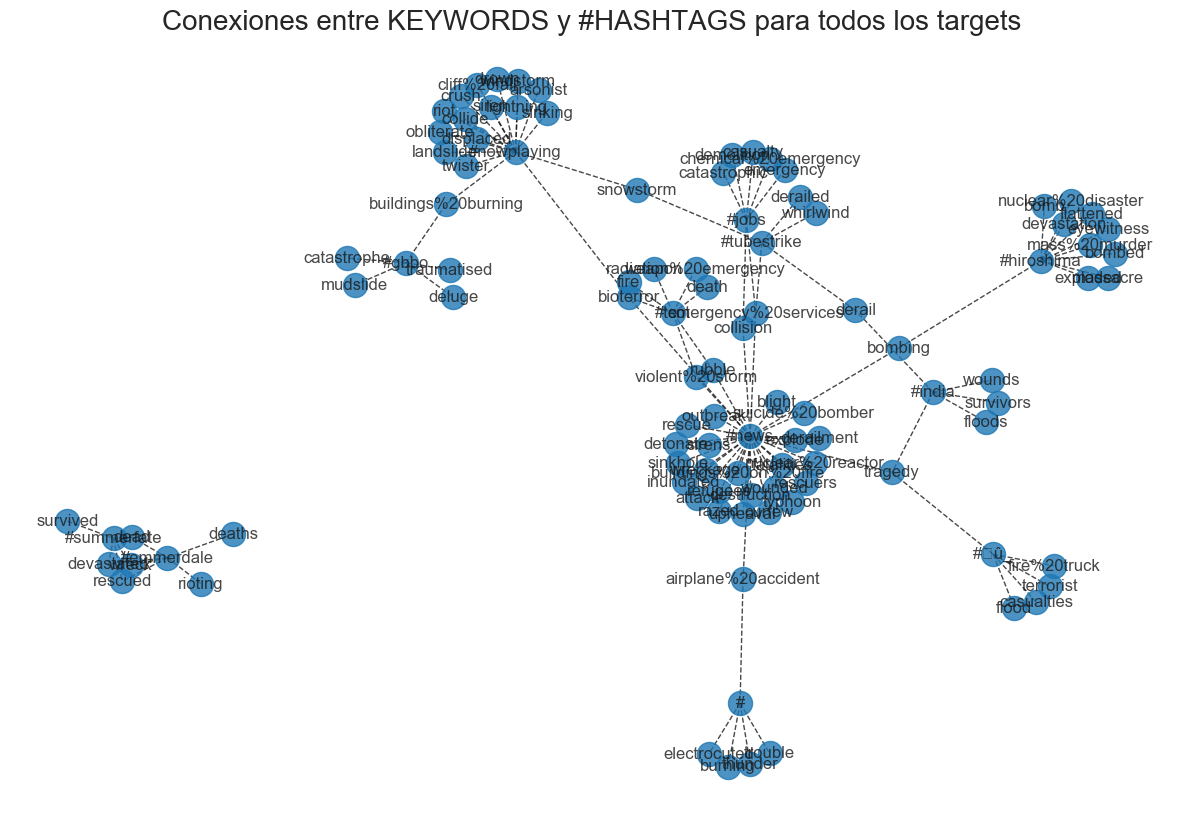

In [332]:
import networkx as nx

# Tamaño para hojas A4.
f, ax = plt.subplots()#figsize=(10,10))

# Build your graph
G=nx.from_pandas_edgelist(df_hashtags_keywords, 'hashtags', 'keyword')

# Plot it
nx.draw(G, with_labels=True, font_size=12, alpha=0.8, style='dashed')

ax.set_title("Conexiones entre KEYWORDS y #HASHTAGS para todos los targets",fontsize=20)
plt.show()


# Relacion entre Hashtags y keywords target==1

In [226]:
df_hashtag_target1 = df_hashtags[df_hashtags['target']==1]

In [311]:
#Separo los hashtags, 1 por fila y dropeo los que no tienen ninguno
df_hashtags_keywords_target1 = pd.DataFrame(df_hashtag_target1.hashtags.str.split(' ').tolist(), index=df_hashtag_target1.keyword).stack()
df_hashtags_keywords_target1 = df_hashtags_keywords_target1.reset_index([0, 'keyword'])
df_hashtags_keywords_target1.columns = ['keyword', 'hashtags']
df_hashtags_keywords_target1['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords_target1 = df_hashtags_keywords_target1.dropna()
df_hashtags_keywords_target1.drop_duplicates(inplace=True)


#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords_target1.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>3]
hashtags_mas_usados.head(50)


,hashtags,keyword
434,#news,23
293,#hiroshima,10
316,#india,5
111,#breaking,4
706,#wx,4
700,#world,4
692,#wildfire,4
437,#newyork,4
726,#û_,4
469,#okwx,4


In [312]:
df_hashtags_keywords_target1['popular'] = df_hashtags_keywords_target1['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords_target1 = df_hashtags_keywords_target1[df_hashtags_keywords_target1['popular']==True]

In [313]:
df_hashtags_keywords_target1.shape

(70, 3)

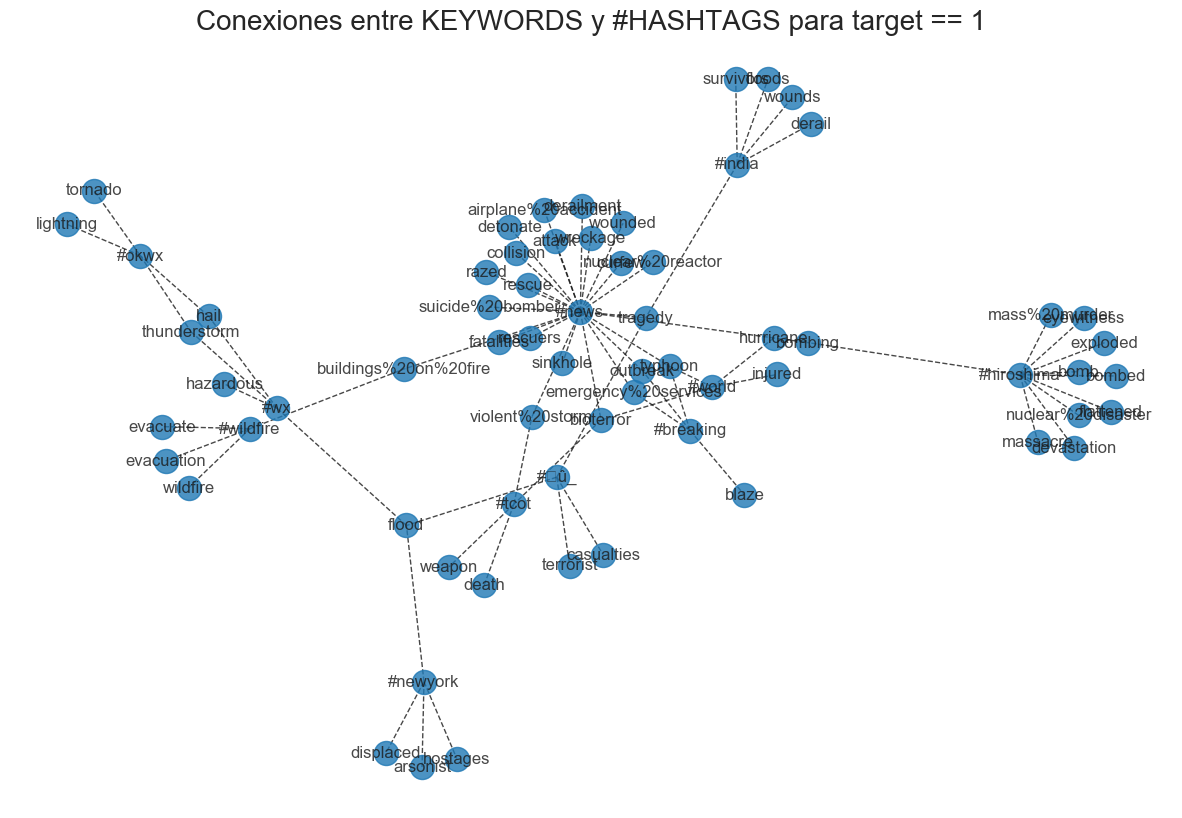

In [333]:
import networkx as nx

# Tamaño para hojas A4.
f, ax = plt.subplots()

# Build your graph
G=nx.from_pandas_edgelist(df_hashtags_keywords_target1, 'hashtags', 'keyword')

# Plot it
nx.draw(G, with_labels=True, font_size=12, alpha=0.8, style='dashed')

ax.set_title("Conexiones entre KEYWORDS y #HASHTAGS para target == 1",fontsize=20)
plt.show()


# Relacion entre Hashtags y keywords target==0

In [254]:
df_hashtag_target0 = df_hashtags[df_hashtags['target']==0]

In [304]:
#Separo los hashtags, 1 por fila y dropeo los que no tienen ninguno
df_hashtags_keywords_target0 = pd.DataFrame(df_hashtag_target0.hashtags.str.split(' ').tolist(), index=df_hashtag_target0.keyword).stack()
df_hashtags_keywords_target0 = df_hashtags_keywords_target0.reset_index([0, 'keyword'])
df_hashtags_keywords_target0.columns = ['keyword', 'hashtags']
df_hashtags_keywords_target0['hashtags'].replace('', np.nan, inplace=True)
df_hashtags_keywords_target0 = df_hashtags_keywords_target0.dropna()
df_hashtags_keywords_target0.drop_duplicates(inplace=True)

#hashtags con mas de 5 apariciones
hashtags_mas_usados = df_hashtags_keywords_target0.groupby('hashtags')[['keyword']].count().reset_index().sort_values(by='keyword', ascending=False)
hashtags_mas_usados = hashtags_mas_usados[hashtags_mas_usados['keyword']>4]
hashtags_mas_usados.head()


,hashtags,keyword
511,#nowplaying,16
495,#news,8
389,#jobs,7
291,#gbbo,5
687,#summerfate,5


In [305]:
df_hashtags_keywords_target0['popular'] = df_hashtags_keywords_target0['hashtags'].isin(hashtags_mas_usados['hashtags'])
df_hashtags_keywords_target0 = df_hashtags_keywords_target0[df_hashtags_keywords_target0['popular']==True]

In [306]:
df_hashtags_keywords_target0.shape

(46, 3)

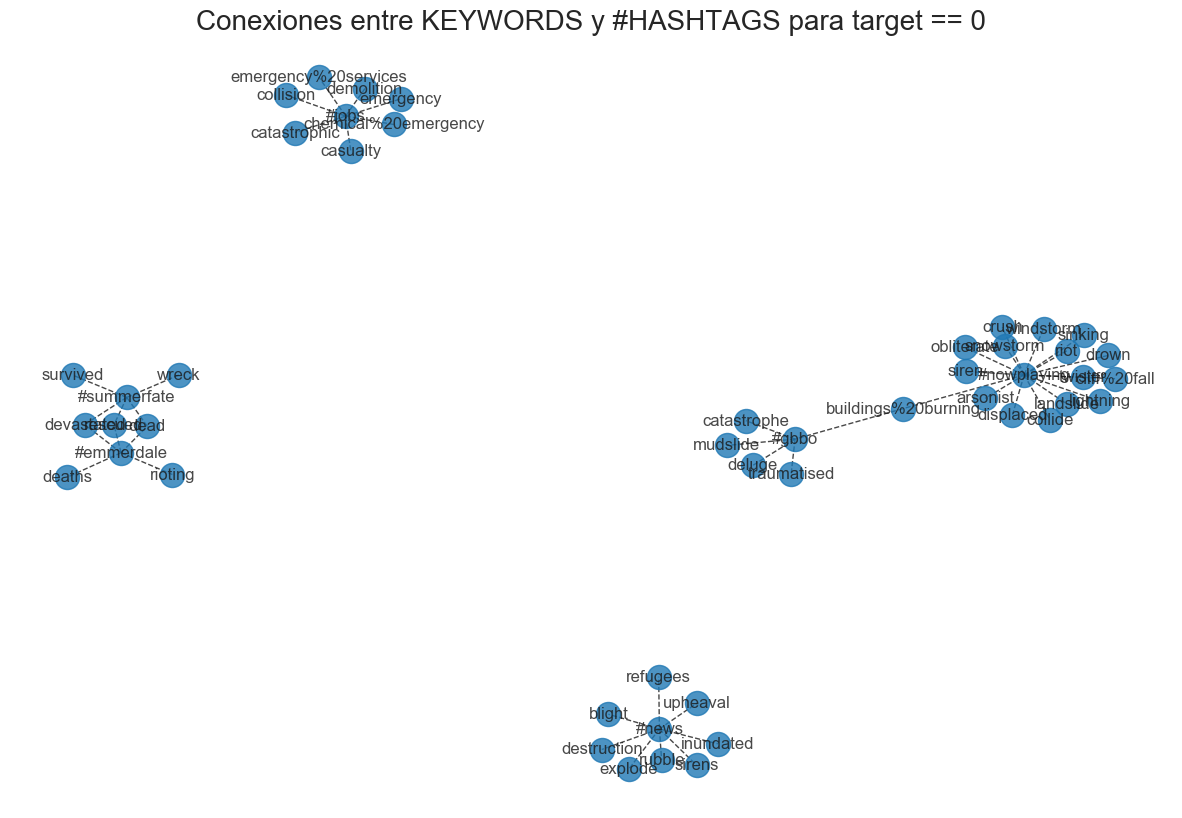

In [315]:
import networkx as nx

# Tamaño para hojas A4.
f, ax = plt.subplots()

# Build your graph
G=nx.from_pandas_edgelist(df_hashtags_keywords_target0, 'hashtags', 'keyword')

# Plot it
nx.draw(G, with_labels=True, font_size=12, alpha=0.8, style='dashed')

ax.set_title("Conexiones entre KEYWORDS y #HASHTAGS para target == 0",fontsize=20)
plt.show()


# ANALISIS SIGNOS DE EXCLAMACION/PREGUNTA

In [24]:
emojis = nlp[['keyword', 'target', 'text']]
emojis.dropna(inplace=True)
emojis.head(15)

,keyword,target,text
31,ablaze,1,@bbcmtd Wholesale Markets ablaze http://t.co/l...
32,ablaze,0,We always try to bring the heavy. #metal #RT h...
33,ablaze,1,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,ablaze,0,Crying out for more! Set me ablaze
35,ablaze,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,ablaze,0,@PhDSquares #mufc they've built so much hype a...
37,ablaze,1,INEC Office in Abia Set Ablaze - http://t.co/3...
38,ablaze,1,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
39,ablaze,0,Ablaze for you Lord :D
40,ablaze,0,Check these out: http://t.co/rOI2NSmEJJ http:/...


In [25]:
emojis['ask'] = emojis['text'].str.count('[!]') + emojis['text'].str.count('[?]')# + emojis['text'].str.count('[:)]') + emojis['text'].str.count(':D')
emojis_agrupado = emojis.groupby('target').sum().reset_index()
emojis_agrupado.head(50)

,target,ask
0,0,3193
1,1,1073


Text(0, 0.5, 'Cantidad')

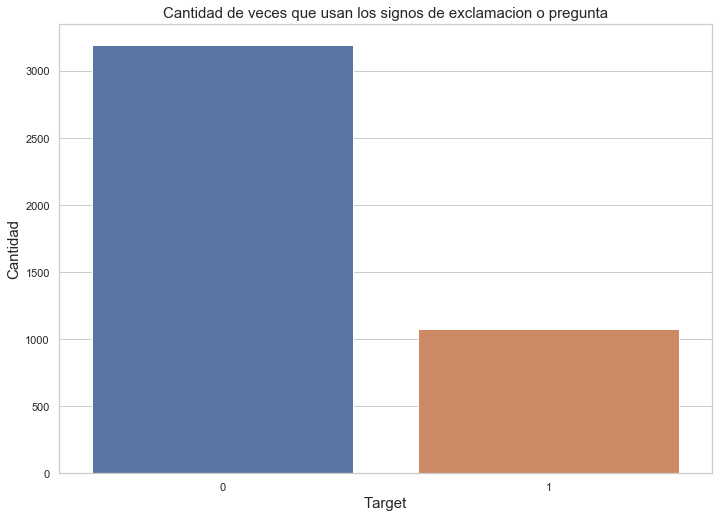

In [26]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x='target', y='ask', data=emojis_agrupado)

ax.set_title("Cantidad de veces que usan los signos de exclamacion o pregunta",fontsize=15)
ax.set_xlabel("Target",fontsize=15)
ax.set_ylabel("Cantidad",fontsize=15)